<a href="https://colab.research.google.com/github/sebabecerra/Red-Semantica/blob/main/ProyectoNuevaConstitucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descargar nueva constitucion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Entorno y gestion de paquetes
!pip install spacy --quiet
#!pip spacy download es_core_news_sm --quiet
!python -m spacy download es_core_news_md --quiet
!python -m spacy download es_core_news_sm --quiet

In [ ]:
!sudo apt install build-essential libpoppler-cpp-dev pkg-config python3-dev
!pip install pdftotext
!pip install PyPDF2
!pip install pdfminer.six

In [ ]:
# Carga librerias
import warnings
warnings.filterwarnings('ignore')
import spacy
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
remove_punct_map = dict.fromkeys(map(ord, string.punctuation))
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
from itertools import compress
from nltk import word_tokenize
import re
from IPython.display import Image
import PyPDF2
import csv
import pdftotext
import PyPDF2
from string import digits

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
esp_stop = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")

In [ ]:
%cd /content/drive/MyDrive
%mkdir TareaFinalPLN
%cd TareaFinalPLN

#Introduccion

Desde el 2019 a la fecha, en Chile, se han registrado multiples manifestaciones que empujan el quehacer politico. En este sentido se ha suscrito un importante acuerdo entre distintras fuerzas y corrientes politicas que ha convergido en el llamado a un plebicito para aprobar o recharzar una nueva constitucion.
En definitiva, se ha dado inicio a lo que podríamos entender como un “proceso constituyente” inédito en la historia nacional. Sin perjuicio de lo anterior, la idea de cambiar completamente la Constitución, ha estado presente desde hace varios años.

En este trabajo, buscamos a traves de un enfoque de analisis de texto contruibuir a la discusion procesando la actual contitcion versus el borrador propuesto en el anio 2022.




#Carga PDF

En esta parte del proyecto descargamos la propuesta de la nueva constitucion desde [www.convencion.cl](https://www.chileconvencion.cl/) y la actual constitucion es obtenida desde la pagina web de la biblioteca del congreso nacional de chile [www.BCN.cl](https://www.bcn.cl/portal/).

In [ ]:
%cd /content/drive/MyDrive/TareaFinalPLN
!wget "https://www.chileconvencion.cl/wp-content/uploads/2022/07/Texto-Definitivo-CPR-2022-Tapas.pdf" -O propuesta.pdf
!wget "https://nuevo.leychile.cl/servicios/Consulta/Exportar?radioExportar=Normas&exportar_formato=pdf&nombrearchivo=DTO-100_22-SEP-2005&exportar_con_notas_bcn=True&exportar_con_notas_originales=True&exportar_con_notas_al_pie=True&hddResultadoExportar=242302.2022-04-29.0.0%23" -O actual.pdf

In [ ]:
with open("/content/drive/MyDrive/TareaFinalPLN/propuesta.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)
with open('propuesta_SS2.txt', 'w') as f:
  f.write("\n\n".join(pdf))

with open("/content/drive/MyDrive/TareaFinalPLN/actual.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)
with open('actual_SS2.txt', 'w') as f:
  f.write("\n\n".join(pdf))

In [ ]:
# #actual constitucion julio
# with open('/content/drive/MyDrive/TareaFinalPLN/Actual_constitucion.txt') as f:
#   actual = f.readlines()
# actual="\n\n".join(actual)

#   #actual constitucion julio
# with open('/content/drive/MyDrive/TareaFinalPLN/Nueva_constitucion.txt') as f:
#   propuesta = f.readlines()
# propuesta="\n\n".join(propuesta)

In [ ]:
#actual constitucion julio
with open('/content/drive/MyDrive/TareaFinalPLN/actual_SS2.txt') as f:
  actual = f.readlines()
actual="\n\n".join(actual)

  #actual constitucion julio
with open('/content/drive/MyDrive/TareaFinalPLN/propuesta_SS2.txt') as f:
  propuesta = f.readlines()
propuesta="\n\n".join(propuesta)

In [ ]:
propuesta

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCONSTITUCIÓN POLÍTICA DE LA\n\n\n   REPÚBLICA DE CHILE\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                        PREÁMBULO\n\n\n Nosotras y nosotros, el pueblo de Chile, conformado\n\n\npor diversas naciones, nos otorgamos libremente esta\n\n\n Constitución, acordada en un proceso participativo,\n\n\n               paritario y democrático.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                              CAPÍTULO I – PRINCIPIOS GENERALES                5\n\n\n                                        CAPÍTULO I\n\n\n                        PRINCIPIOS Y DISPOSICIONES GENERALES\n\n\nArtículo 1\n\n\n1. Chile es un Estado social y democrático de derecho. Es plurinacional,\n\n\n   intercultural, regional y ecológico.\n\n\n2. Se constituye como una república solidaria. Su democracia es inclusiva y\n\n\n   paritaria. Reconoce como valores intrínsecos e irrenunciables la dignidad, la\n\n\n   libertad, la igualdad sustantiva de los seres humanos y su relación 

##Pre-Procesamiento

Procesamos ambos textos de igual forma para corregir por stopwords y otros caracteres.

###1. Limpieza Stopwords



In [ ]:
texto = propuesta.lower()
stopword_es = nltk.corpus.stopwords.words('spanish')
text_tokens = word_tokenize(texto)
tokens_without_sw = [word for word in text_tokens if not word in stopword_es]
filtered_text = (" ").join(tokens_without_sw)
text_tokens = word_tokenize(filtered_text)
stopwords.update=["artículo", "capítulo", "decreto", "n°", '°', "inciso",
                  "dicha","año", "fija", "constitucion", "politica",
                  "republica", "ministerio", "secretaría", "general",
                  "presidencia", "publicación", "promulgación",  "tipo",
                  "versión", "última", "ultima","modificación",
                  "biblioteca", "congreso", "nacional","página", "documento",
                  "www.leychile.cl", "generado", "agosto", "bcnclitu", "septiembre",
                  "refiere","ley", "orgánica","plazo", "siguientes", "miembros",
                 "siguiente", 'inciso', 'número', 'efecto', 'fecha',
                  'años', 'procederá', 'mayo', 'dichas', 'formas',
                 "incisos", 'deberán', 'deber', 'º', 'nº', 'ámbito'
                 , 'ámbitos', 'áreas', 'velar', 'ad', 'única', 'únicas',
                 'único', 'útiles', 'constitución', 'constitucional'
                 , 'deberá', 'determinará', 'chile', 'ser', 'por', 'ningún',
                  'caso', 'según', 'corresponda', 'treinta', 'días',
                  'funcionarios', 'funcioanarias', 'diputados', 'diputadas',
                  'ministros', 'ministras', 'consejeros', 'consejeras',
                  'autónomo', 'autónomos', 'organismo', 'organismos',
                  'trabajadores', 'trabajadoras', 'jueces', 'juezas',
                  "medidas", "necesarias", "podrá", "establecer", "demás",
                  "atribuciones", "disposición", "transitoria",
                  "medidas", "necesarias", "texto", "refundido"
                  , "disposiciones", "transitorias",
                  "vigentes", "ratificados", "política", "república",
                  'preámbulo', 'mayoria', 'presidente', 'presidentes',
                  "presidenta", 'presidentas', "adolecentes","niños",
                  "niñas", 'servicio', 'electoral']
tokens_without_sw = [word for word in text_tokens if not word in stopwords.update]
propuesta_filtrada = (" ").join(tokens_without_sw)

In [ ]:
propuesta_filtrada

", pueblo , conformado diversas naciones , otorgamos libremente , acordada proceso participativo , paritario democrático . i – principios generales 5 i principios generales 1 1. social democrático derecho . plurinacional , intercultural , regional ecológico . 2. constituye solidaria . democracia inclusiva paritaria . reconoce valores intrínsecos irrenunciables dignidad , libertad , igualdad sustantiva seres humanos relación indisoluble naturaleza . 3. protección garantía derechos humanos individuales colectivos fundamento orientan toda actividad . generar condiciones proveer bienes servicios asegurar igual goce derechos integración personas vida , económica , social cultural pleno desarrollo . 2 1. soberanía reside pueblo , conformado diversas naciones . ejerce democráticamente , manera directa representativa , reconociendo límite derechos humanos cuanto atributo deriva dignidad humana . 2. individuo sector pueblo puede atribuirse ejercicio . 3 , diversidad geográfica , natural , histó

In [ ]:
texto = actual.lower()
stopword_es = nltk.corpus.stopwords.words('spanish')
text_tokens = word_tokenize(texto)
tokens_without_sw = [word for word in text_tokens if not word in stopword_es]
filtered_text = (" ").join(tokens_without_sw)
text_tokens = word_tokenize(filtered_text)
stopwords.update=["artículo", "capítulo", "decreto", "n°", '°', "inciso",
                  "dicha","año", "fija", "constitucion", "politica",
                  "republica", "ministerio", "secretaría", "general",
                  "presidencia", "publicación", "promulgación",  "tipo",
                  "versión", "última", "ultima","modificación",
                  "biblioteca", "congreso", "nacional","página", "documento",
                  "www.leychile.cl", "generado", "agosto", "bcnclitu", "septiembre",
                  "refiere","ley", "orgánica","plazo", "siguientes", "miembros",
                 "siguiente", 'inciso', 'número', 'efecto', 'fecha',
                  'años', 'procederá', 'mayo', 'dichas', 'formas',
                 "incisos", 'deberán', 'deber', 'º', 'nº', 'ámbito'
                 , 'ámbitos', 'áreas', 'velar', 'ad', 'única', 'únicas',
                 'único', 'útiles', 'constitución', 'constitucional'
                 , 'deberá', 'determinará', 'chile', 'ser', 'por', 'ningún',
                  'caso', 'según', 'corresponda', 'treinta', 'días',
                  'funcionarios', 'funcioanarias', 'diputados', 'diputadas',
                  'ministros', 'ministras', 'consejeros', 'consejeras',
                  'autónomo', 'autónomos', 'organismo', 'organismos',
                  'trabajadores', 'trabajadoras', 'jueces', 'juezas',
                  "medidas", "necesarias", "podrá", "establecer", "demás",
                  "atribuciones", "disposición", "transitoria",
                  "medidas", "necesarias", "texto", "refundido"
                  , "disposiciones", "transitorias",
                  "vigentes", "ratificados", "política", "república",
                  'preámbulo', 'mayoria', 'presidente', 'presidentes',
                  "presidenta", 'presidentas', "adolecentes","niños",
                  "niñas", 'servicio', 'electoral']
tokens_without_sw = [word for word in text_tokens if not word in stopwords.update]
actual_filtrada = (" ").join(tokens_without_sw)

In [ ]:
actual_filtrada

"100 ( 2005 ) 100 , coordinado sistematizado : 22-sep-2005 | : 17-sep-2005 : intermedio : 29-abr-2022 inicio vigencia : 29-abr-2022 fin vigencia : 22-ago-2022 : 29-abr-2022 21448 url corta : https : //bcn.cl/30itu , coordinado sistematizado núm . 100.- santiago , 17 2005.- visto : uso facultades confiere 2° 20.050 , presente dispuesto 32 n°8 1980 , : fíjase , coordinado sistematizado : i bases institucionalidad 1°.- personas nacen libres iguales dignidad derechos . familia núcleo fundamental sociedad . cpr art . 1° d.o . reconoce ampara grupos intermedios 24.10.1980 través cuales organiza estructura sociedad 19.611 art . garantiza adecuada autonomía cumplir propios fines específicos . nº1 d.o . 16.06.1999 persona humana finalidad promover bien común , debe contribuir crear condiciones sociales permitan cada integrantes comunidad mayor realización espiritual material posible , pleno respeto derechos garantías establece . resguardar seguridad , dar protección población familia , propende

###2. Limpieza Texto

In [ ]:
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º–°'''
actual_filtrada = actual_filtrada.translate(str.maketrans('', '', string.punctuation))
actual_filtrada = actual_filtrada.translate(str.maketrans('', '', punctuations1))
actual_filtrada = actual_filtrada.translate(str.maketrans('', '', digits))
actual_filtrada = re.sub('\n\n+', '\n', actual_filtrada)
actual_filtrada = re.sub('\n', '', actual_filtrada)
actual_filtrada = re.sub('(?<=\w)\s*\n(?=\w)', ' ', actual_filtrada)
actual_filtrada = actual_filtrada.replace("  ", " ")
actual_filtrada = actual_filtrada.replace("  ", " ")
actual_filtrada = actual_filtrada.strip()
actual_filtrada = actual_filtrada.rstrip()
#actual_filtrada = actual_filtrada.strip()
#actual_filtrada = actual_filtrada.replace("  ", " ")

In [ ]:
actual_filtrada

'coordinado sistematizado sep sep intermedio abr inicio vigencia abr fin vigencia ago abr url corta https bcnclitu coordinado sistematizado núm santiago visto uso facultades confiere presente dispuesto n fíjase coordinado sistematizado i bases institucionalidad personas nacen libres iguales dignidad derechos familia núcleo fundamental sociedad cpr art do reconoce ampara grupos intermedios través cuales organiza estructura sociedad art garantiza adecuada autonomía cumplir propios fines específicos n do persona humana finalidad promover bien común debe contribuir crear condiciones sociales permitan cada integrantes comunidad mayor realización espiritual material posible pleno respeto derechos garantías establece resguardar seguridad dar protección población familia propender fortalecimiento ésta promover integración armónica sectores nación asegurar derecho personas participar igualdad oportunidades vida nov  emblemas nacionales bandera escudo armas himno cpr art do unitario administraci

In [ ]:
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º–°'''
propuesta_filtrada = propuesta_filtrada.translate(str.maketrans('', '', string.punctuation))
propuesta_filtrada = propuesta_filtrada.translate(str.maketrans('', '', punctuations1))
propuesta_filtrada = propuesta_filtrada.translate(str.maketrans('', '', digits))
propuesta_filtrada = re.sub('\n\n+', '\n', propuesta_filtrada)
propuesta_filtrada = re.sub('\n', '', propuesta_filtrada)
propuesta_filtrada = re.sub('(?<=\w)\s*\n(?=\w)', ' ', propuesta_filtrada)
propuesta_filtrada = propuesta_filtrada.replace("  ", " ")
propuesta_filtrada = propuesta_filtrada.replace("  ", " ")
propuesta_filtrada = propuesta_filtrada.strip()
propuesta_filtrada = propuesta_filtrada.rstrip()

In [ ]:
propuesta_filtrada

'pueblo conformado diversas naciones otorgamos libremente acordada proceso participativo paritario democrático i principios generales i principios generales social democrático derecho plurinacional intercultural regional ecológico constituye solidaria democracia inclusiva paritaria reconoce valores intrínsecos irrenunciables dignidad libertad igualdad sustantiva seres humanos relación indisoluble naturaleza protección garantía derechos humanos individuales colectivos fundamento orientan toda actividad generar condiciones proveer bienes servicios asegurar igual goce derechos integración personas vida económica social cultural pleno desarrollo soberanía reside pueblo conformado diversas naciones ejerce democráticamente manera directa representativa reconociendo límite derechos humanos cuanto atributo deriva dignidad humana individuo sector pueblo puede atribuirse ejercicio diversidad geográfica natural histórica cultural forma territorio indivisible personas nacen permanecen libres inter

##Guardar .txt

In [ ]:
propuesta_filtrada=re.sub(r'\bderecho\b', 'derechos', propuesta_filtrada)
propuesta_filtrada=re.sub(r'\bpersonas\b', 'persona', propuesta_filtrada)
propuesta_filtrada=re.sub(r'\bpresidenta\b', 'presidente', propuesta_filtrada)
propuesta_filtrada=re.sub(r'\bchileartículo\b', '', propuesta_filtrada)
propuesta_filtrada=re.sub(r'\brepúblicaartículo\b', '', propuesta_filtrada)
propuesta_filtrada=re.sub(r'artículo', '', propuesta_filtrada)
propuesta_filtrada=re.sub(r'\b\w{1,3}\b', '', propuesta_filtrada)

In [ ]:
propuesta_filtrada

'pueblo conformado diversas naciones otorgamos libremente acordada proceso participativo paritario democrático  principios generales  principios generales social democrático derechos plurinacional intercultural regional ecológico constituye solidaria democracia inclusiva paritaria reconoce valores intrínsecos irrenunciables dignidad libertad igualdad sustantiva seres humanos relación indisoluble naturaleza protección garantía derechos humanos individuales colectivos fundamento orientan toda actividad generar condiciones proveer bienes servicios asegurar igual goce derechos integración persona vida económica social cultural pleno desarrollo soberanía reside pueblo conformado diversas naciones ejerce democráticamente manera directa representativa reconociendo límite derechos humanos cuanto atributo deriva dignidad humana individuo sector pueblo puede atribuirse ejercicio diversidad geográfica natural histórica cultural forma territorio indivisible persona nacen permanecen libres interdep

In [ ]:
actual_filtrada=re.sub(r'\bderecho\b', 'derechos', actual_filtrada)
actual_filtrada=re.sub(r'\bpersonas\b', 'persona', actual_filtrada)
actual_filtrada=re.sub(r'\bpresidenta\b', 'presidente', actual_filtrada)
actual_filtrada=re.sub(r'\bchileartículo\b', '', actual_filtrada)
actual_filtrada=re.sub(r'\brepúblicaartículo\b', '', actual_filtrada)
actual_filtrada=re.sub(r'artículo', '', actual_filtrada)
actual_filtrada=re.sub(r'\b\w{1,3}\b', '', actual_filtrada)

In [ ]:
actual_filtrada

'coordinado sistematizado   intermedio  inicio vigencia   vigencia    corta https bcnclitu coordinado sistematizado  santiago visto  facultades confiere presente dispuesto  fíjase coordinado sistematizado  bases institucionalidad persona nacen libres iguales dignidad derechos familia núcleo fundamental sociedad    reconoce ampara grupos intermedios través cuales organiza estructura sociedad  garantiza adecuada autonomía cumplir propios fines específicos   persona humana finalidad promover bien común debe contribuir crear condiciones sociales permitan cada integrantes comunidad mayor realización espiritual material posible pleno respeto derechos garantías establece resguardar seguridad  protección población familia propender fortalecimiento ésta promover integración armónica sectores nación asegurar derechos persona participar igualdad oportunidades vida   emblemas nacionales bandera escudo armas himno    unitario administración funcional territorialmente descentralizada desconcentrada 

In [ ]:
total_palabras_actual=len(actual_filtrada)
total_palabras_propuesta=len(propuesta_filtrada)
total_palabras= total_palabras_actual+total_palabras_propuesta
print("Total Palabras",total_palabras)
print("Total Palabras Actual",total_palabras_actual)
print("Total Palabras Propuesta",total_palabras_propuesta)

Total Palabras 399493
Total Palabras Actual 178822
Total Palabras Propuesta 220671


In [ ]:
tokens_actual = word_tokenize(actual_filtrada)
tokens_propuesta = word_tokenize(propuesta_filtrada)

In [ ]:
unicas_actual = set(tokens_actual)
unicas_propuesta=set(tokens_propuesta)
print(len(unicas_actual))
print(len(unicas_propuesta))
#unicas_actual

3947
4907


Al comparar las 10 palabras mas frecuentes en ambos dicumentos pordemos observar que

In [ ]:
# Pasamos toks a dataframe
# Muestra total las palabras sin stopwords
df_tokens_clean_actual = pd.DataFrame(tokens_actual, columns =['token'])
df_tokens_clean_propuesta = pd.DataFrame(tokens_propuesta, columns =['token'])
print("Primera 10 palabras texto actual \n",
      df_tokens_clean_actual.head(10), "\n" ,"\n",
      "Primera 10 palabras texto propuesto \n",
      df_tokens_clean_propuesta.head(10))

#print("Total de Palabras", len(df_tokens_clean))

Primera 10 palabras texto actual 
            token
0     coordinado
1  sistematizado
2     intermedio
3         inicio
4       vigencia
5       vigencia
6          corta
7          https
8       bcnclitu
9     coordinado 
 
 Primera 10 palabras texto propuesto 
            token
0         pueblo
1     conformado
2       diversas
3       naciones
4      otorgamos
5     libremente
6       acordada
7        proceso
8  participativo
9      paritario


In [ ]:
# Frecuencia de palabras
tokens_count_actual = df_tokens_clean_actual['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_actual = tokens_count_actual[tokens_count_actual.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count_actual.head(30), "\n",
      "Numero de registros", len(tokens_count_actual))
tokens_count_actual.to_csv('/content/tokens_count_actual.csv', encoding='utf-8')

Frecuencia de Palabras 
              token  counts
0         derechos     122
1           podrán     116
2        ejercicio     113
3         tribunal     105
4          persona      99
5           dentro      96
6         regional      88
7            forma      84
8         elección      84
9            cargo      83
10       funciones      79
11           corte      78
12          fuerza      73
13      elecciones      69
14            cada      68
15      respectiva      66
16      convención      66
17       dispuesto      66
18         acuerdo      66
19     conformidad      66
20          normas      64
21  convencionales      63
22  constituyentes      60
23          cámara      59
24      regionales      58
25      candidatos      58
26          fondos      57
27       seguridad      56
28      plebiscito      56
29   sistematizado      53 
 Numero de registros 1187


In [ ]:
# Frecuencia de palabras
tokens_count_propuesta = df_tokens_clean_propuesta['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_propuesta = tokens_count_propuesta[tokens_count_propuesta.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count_propuesta.head(30), "\n",
      "Numero de registros", len(tokens_count_propuesta))
tokens_count_propuesta.to_csv('/content/tokens_count_propuesta.csv', encoding='utf-8')

Frecuencia de Palabras 
              token  counts
0         derechos     422
1          persona     234
2        ejercicio     160
3         regional     142
4         conforme     100
5             toda      94
6          órganos      94
7         regiones      92
8           podrán      92
9           cámara      90
10        justicia      90
11      regionales      89
12           forma      87
13       funciones      86
14         sistema      84
15           cargo      83
16   participación      82
17       entidades      81
18   territoriales      79
19         pública      78
20    organización      75
21           corte      73
22  administración      72
23          dentro      70
24     territorial      69
25      protección      69
26      naturaleza      67
27        públicos      67
28         función      67
29     integrantes      67 
 Numero de registros 1321


In [ ]:
corpus=df_tokens_clean_actual.append(df_tokens_clean_propuesta, ignore_index=True)
# Frecuencia de palabras
tokens_count_corpus = corpus['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_corpus = tokens_count_corpus[tokens_count_corpus.counts>0]
print("Frecuencia de Palabras \n",
      tokens_count_corpus.head(30), "\n",
      "Numero de registros", len(tokens_count_corpus))
tokens_count_corpus.to_csv('/content/tokens_count_corpus.csv', encoding='utf-8')



Frecuencia de Palabras 
              token  counts
0         derechos     544
1          persona     333
2        ejercicio     273
3         regional     230
4           podrán     208
5            forma     171
6            cargo     166
7           dentro     166
8        funciones     165
9            corte     151
10        tribunal     150
11          cámara     149
12      regionales     147
13        conforme     133
14        elección     129
15         pública     127
16         acuerdo     124
17         sistema     119
18            toda     118
19           leyes     115
20  administración     115
21        regiones     113
22         órganos     112
23        justicia     111
24            cada     108
25        proyecto     105
26   participación     105
27    organización     104
28         público     103
29     conformidad     100 
 Numero de registros 6390


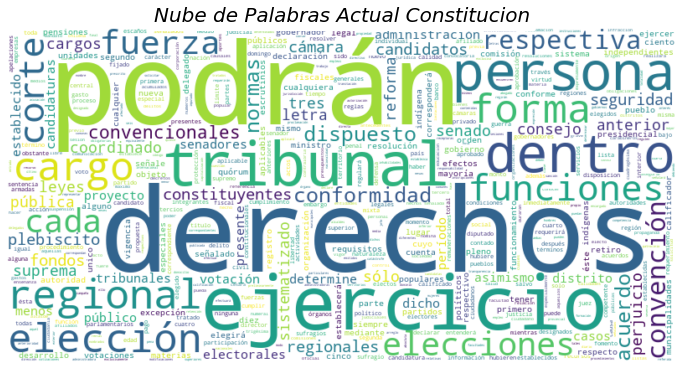

In [ ]:
# Pregunta 1. Wordcloud por token
data = dict(zip(tokens_count_actual['token'].tolist(), tokens_count_actual['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Actual Constitucion",
          fontsize='20',
          loc="center",
          backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

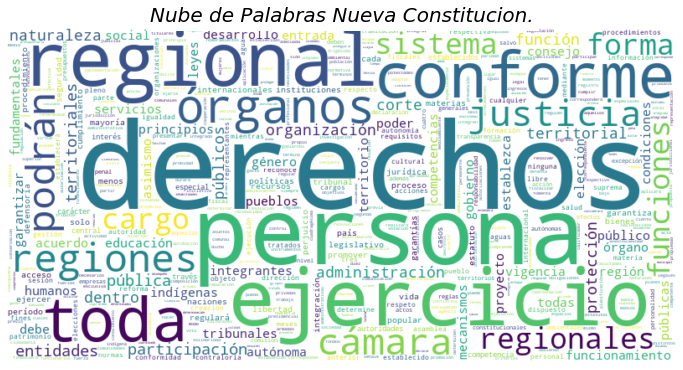

In [ ]:
# Pregunta 1. Wordcloud por token
data = dict(zip(tokens_count_propuesta['token'].tolist(), tokens_count_propuesta['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Nueva Constitucion.",
          fontsize='20',
          loc="center",
          backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

In [ ]:
#tag para constitucion actual
nlp = spacy.load("es_core_news_sm")
mytext = nlp(actual_filtrada)
palabras_actual = [token.text for token in mytext]
clase_palabras_actual = [token.tag_ for token in mytext]

In [ ]:
# Data Frame de Palabras y tags de Palabras actual
data_tag_actual = pd.DataFrame({'palabras':palabras_actual, 'clase_palabras':clase_palabras_actual})
print(data_tag_actual.head(10), "\n",
      "Numero de Registros", len(data_tag_actual))

        palabras clase_palabras
0     coordinado            ADJ
1  sistematizado            ADJ
2                         SPACE
3     intermedio           NOUN
4                         SPACE
5         inicio            ADJ
6       vigencia           NOUN
7                         SPACE
8       vigencia           NOUN
9                         SPACE 
 Numero de Registros 20559


In [ ]:
#tag para constitucion propuesta
nlp = spacy.load("es_core_news_sm")
mytext = nlp(propuesta_filtrada)
palabras_propuesta = [token.text for token in mytext]
clase_palabras_propuesta = [token.tag_ for token in mytext]

In [ ]:
# Data Frame de Palabras y tags de Palabras proipuesta
data_tag_propuesta = pd.DataFrame({'palabras':palabras_propuesta, 'clase_palabras':clase_palabras_propuesta})
print(data_tag_propuesta.head(10), "\n",
      "Numero de Registros", len(data_tag_propuesta))

        palabras clase_palabras
0         pueblo           NOUN
1     conformado            ADJ
2       diversas            DET
3       naciones           NOUN
4      otorgamos           VERB
5     libremente            ADV
6       acordada            ADJ
7        proceso           NOUN
8  participativo            ADJ
9      paritario           NOUN 
 Numero de Registros 23644


In [ ]:
# Filtro por NOUN actual
data_tag_noun_actual = data_tag_actual[(data_tag_actual["clase_palabras"] == "NOUN")]
print(data_tag_noun_actual.head(10), "\n",
          "Numero de registros", len(data_tag_noun_actual))

             palabras clase_palabras
3          intermedio           NOUN
6            vigencia           NOUN
8            vigencia           NOUN
10              corta           NOUN
12           bcnclitu           NOUN
16           santiago           NOUN
19         facultades           NOUN
24             fíjase           NOUN
28              bases           NOUN
29  institucionalidad           NOUN 
 Numero de registros 6789


In [ ]:
# Filtro por NOUN propuesta
data_tag_noun_propuesta = data_tag_propuesta[(data_tag_propuesta["clase_palabras"] == "NOUN")]
print(data_tag_noun_propuesta.head(10), "\n",
          "Numero de registros", len(data_tag_noun_propuesta))

      palabras clase_palabras
0       pueblo           NOUN
3     naciones           NOUN
7      proceso           NOUN
9    paritario           NOUN
12  principios           NOUN
15  principios           NOUN
19    derechos           NOUN
26  democracia           NOUN
28   paritaria           NOUN
30     valores           NOUN 
 Numero de registros 8666


In [ ]:
# Frecuencia de palabras NOUN actual
tokens_count_noun_actual = data_tag_noun_actual['palabras'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_noun_actual = tokens_count_noun_actual[tokens_count_noun_actual.counts>3]
print(tokens_count_noun_actual.head(20), "\n",
      "Numero de registros", len(tokens_count_noun_actual))

          token  counts
0     ejercicio      91
1      derechos      89
2      elección      72
3       persona      70
4         cargo      68
5        fuerza      67
6         forma      65
7    elecciones      64
8       acuerdo      63
9     funciones      61
10        corte      59
11   candidatos      58
12   convención      55
13  conformidad      54
14       normas      53
15       fondos      48
16   plebiscito      45
17      reforma      44
18       cargos      43
19     votación      40 
 Numero de registros 452


In [ ]:
# Frecuencia de palabras NOUN propuesta
tokens_count_noun_propuesta = data_tag_noun_propuesta['palabras'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count_noun_propuesta = tokens_count_noun_propuesta[tokens_count_noun_propuesta.counts>3]
print(tokens_count_noun_propuesta.head(20), "\n",
      "Numero de registros", len(tokens_count_noun_propuesta))

            token  counts
0        derechos     328
1         persona     172
2       ejercicio     135
3        regiones      85
4         órganos      74
5   participación      74
6           forma      71
7    organización      70
8           cargo      66
9      naturaleza      66
10      entidades      63
11      funciones      63
12       proyecto      57
13     protección      56
14        acuerdo      54
15      educación      53
16        sistema      51
17          leyes      48
18      servicios      48
19     territorio      47 
 Numero de registros 496


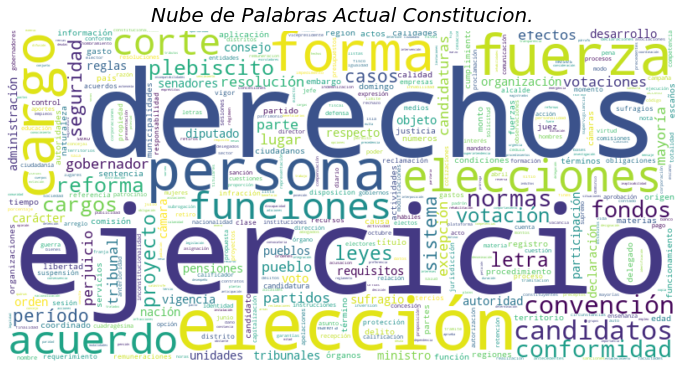

In [ ]:
# Pregunta 2.1. Wordcloud por token sustantivos actual
data = dict(zip(tokens_count_noun_actual['token'].tolist(), tokens_count_noun_actual['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Actual Constitucion.",
          fontsize='20',
          loc="center",
          backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

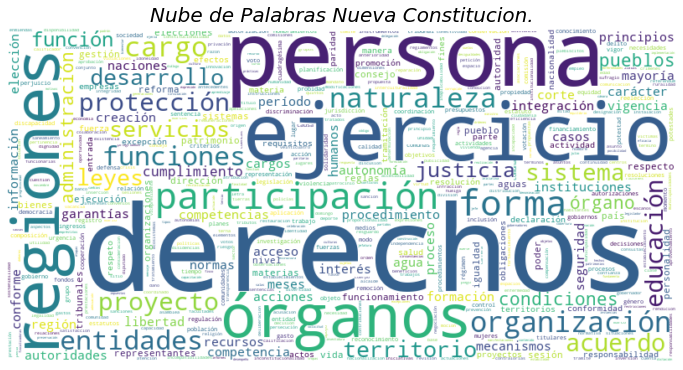

In [ ]:
# Pregunta 2.1. Wordcloud por token sustantivos propuesta
data = dict(zip(tokens_count_noun_propuesta['token'].tolist(), tokens_count_noun_propuesta['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Nueva Constitucion.",
          fontsize='20',
          loc="center",
          backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

# Word Tree
-----------------------

<figure>
<figcaption align = "center"><b>**Actual Constitucion**</b></figcaption>

![picture](https://drive.google.com/uc?export=view&id=12rdJ_XL_1-C559UemwTJmFVbdhrN_UOm)


</figure>


<figure>

<figcaption align = "center"><b>Nueva Constitucion</b></figcaption>

![picture](https://drive.google.com/uc?export=view&id=1fRvpLYUNKGHycGVucSfcfasvCvrnOGPb)

</figure>




##Bigramas

In [ ]:
#Actual constitucion
mytext = nlp(actual_filtrada)
tokens_actual = [token.text for token in mytext]
tags_actual = [token.tag_ for token in mytext]
if len(tokens_actual)>1:
  bi_tokens_actual = [' '.join(x) for x in list(nltk.bigrams(tokens_actual))]
  bi_tag_actual = [' '.join(x) for x in list(nltk.bigrams(tags_actual))]

In [ ]:
#Nueva constitucion
mytext = nlp(propuesta_filtrada)
tokens_propuesta = [token.text for token in mytext]
tags_propuesta = [token.tag_ for token in mytext]
if len(tokens_propuesta)>1:
  bi_tokens_propuesta = [' '.join(x) for x in list(nltk.bigrams(tokens_propuesta))]
  bi_tag_propuesta = [' '.join(x) for x in list(nltk.bigrams(tags_propuesta))]

In [ ]:
# Filtro por NOUN - ADJ actual
data_tag_actual = pd.DataFrame({'token_bi':bi_tokens_actual, 'tag_bi':bi_tag_actual})
data_tag_actual =data_tag_actual[data_tag_actual["tag_bi"] == "NOUN ADJ"]
print(data_tag_actual.head(10), "\n" ,
      "Numero de Registros", len(data_tag_actual))

                     token_bi    tag_bi
12        bcnclitu coordinado  NOUN ADJ
16             santiago visto  NOUN ADJ
24          fíjase coordinado  NOUN ADJ
29  institucionalidad persona  NOUN ADJ
37         núcleo fundamental  NOUN ADJ
43         grupos intermedios  NOUN ADJ
56          fines específicos  NOUN ADJ
59             persona humana  NOUN ADJ
68       condiciones sociales  NOUN ADJ
73            comunidad mayor  NOUN ADJ 
 Numero de Registros 3334


In [ ]:
# Filtro por NOUN - ADJ nueva
data_tag_propuesta = pd.DataFrame({'token_bi':bi_tokens_propuesta, 'tag_bi':bi_tag_propuesta})
data_tag_propuesta =data_tag_propuesta[data_tag_propuesta["tag_bi"] == "NOUN ADJ"]
print(data_tag_propuesta.head(10), "\n" ,
      "Numero de Registros", len(data_tag_propuesta))

                  token_bi    tag_bi
0        pueblo conformado  NOUN ADJ
7    proceso participativo  NOUN ADJ
9    paritario democrático  NOUN ADJ
12    principios generales  NOUN ADJ
15    principios generales  NOUN ADJ
19  derechos plurinacional  NOUN ADJ
26    democracia inclusiva  NOUN ADJ
30     valores intrínsecos  NOUN ADJ
33       dignidad libertad  NOUN ADJ
35     igualdad sustantiva  NOUN ADJ 
 Numero de Registros 4536


In [ ]:
# Frecuencia de bigramas NOUN - ADJ actual
ngram_noun_adj_actual = pd.DataFrame(data_tag_actual['token_bi'])
ngram_noun_adj_count_actual = ngram_noun_adj_actual['token_bi'].value_counts().rename_axis('ngram').reset_index(name='counts')
print(ngram_noun_adj_count_actual.head(30), "\n",
      "Numero de Resgistros", len(ngram_noun_adj_actual))

                        ngram  counts
0               corte suprema      39
1        votaciones populares      30
2         gobernador regional      29
3          partidos políticos      25
4            diputado senador      18
5            unidades fomento      17
6       delegado presidencial      17
7    coordinado sistematizado      15
8            convención mixta      14
9            partido político      13
10          pueblos indígenas      12
11          seguridad pública      12
12          fondos acumulados      11
13  candidatos independientes      11
14           mayoría absoluta      10
15           elección popular       9
16    gobernadores regionales       9
17       nacionalidad chilena       9
18             poder judicial       9
19  capitalización individual       9
20    elección convencionales       9
21  cotizaciones obligatorias       9
22        perjuicio dispuesto       9
23       elecciones primarias       8
24         servicios públicos       8
25          

In [ ]:
# Frecuencia de bigramas NOUN - ADJ nueva
ngram_noun_adj_propuesta = pd.DataFrame(data_tag_propuesta['token_bi'])
ngram_noun_adj_count_propuesta = ngram_noun_adj_propuesta['token_bi'].value_counts().rename_axis('ngram').reset_index(name='counts')
print(ngram_noun_adj_count_propuesta.head(30), "\n",
      "Numero de Resgistros", len(ngram_noun_adj_propuesta))

                        ngram  counts
0     entidades territoriales      59
1      derechos fundamentales      47
2          naciones indígenas      35
3             sesión conjunta      21
4             región autónoma      21
5          servicios públicos      21
6         mayoría integrantes      19
7           poder legislativo      19
8       personalidad jurídica      19
9   representantes regionales      17
10           derechos humanos      16
11           acuerdo regional      14
12     derechos internacional      12
13   organización territorial      12
14     administración central      12
15      participación popular      12
16              corte suprema      11
17       gobiernos regionales      11
18   órganos constitucionales      11
19            función pública      11
20         ejercicio derechos      11
21             bienes comunes      10
22          empresas públicas      10
23     función jurisdiccional      10
24           elección popular      10
25        ig

In [ ]:
bi_tokens_actual=data_tag_actual['token_bi'].tolist()
bi_tokens_propuesta=data_tag_propuesta['token_bi'].tolist()


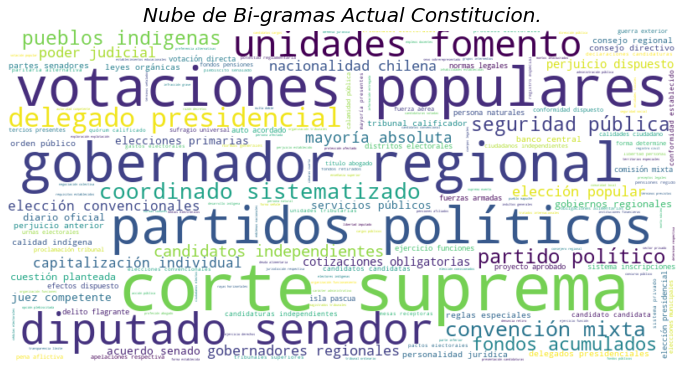

In [ ]:
# WordCloud x Bigramas NOUN-ADJ actual
data = dict(zip(ngram_noun_adj_count_actual['ngram'].tolist(), ngram_noun_adj_count_actual['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Bi-gramas Actual Constitucion.",
          fontsize='20',
          loc="center",
          backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

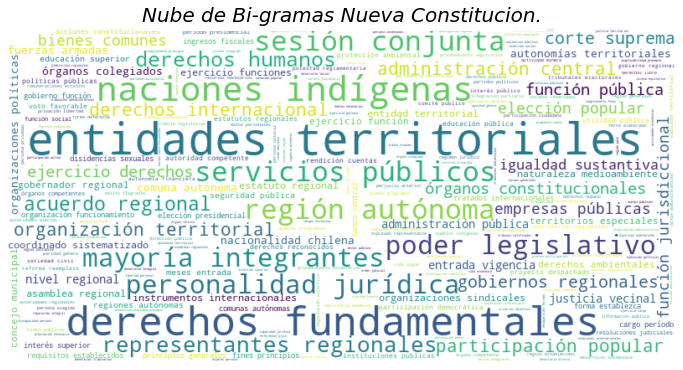

In [ ]:
# WordCloud x Bigramas NOUN-ADJ nueva
data = dict(zip(ngram_noun_adj_count_propuesta['ngram'].tolist(), ngram_noun_adj_count_propuesta['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Bi-gramas Nueva Constitucion.",
          fontsize='20',
          loc="center",
          backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

##Red Semantica

In [ ]:
#!pip install rpy2==3.5.1

In [ ]:
# Cargamos extension de R para python / Colab
%load_ext rpy2.ipython
# import rpy2.robjects as ro
# from rpy2.robjects.packages import importr
# from rpy2.robjects import pandas2ri

# from rpy2.robjects.conversion import localconverter

In [ ]:
#!pip uninstall rpy2 -y

In [ ]:
#!pip install rpy2==3.5.1

In [ ]:
# Toma unos minutos (5-10) cargar los paquetes de R
# Paciencia :)
%%R
start_time <- Sys.time()
install.packages("igraph", quiet = TRUE)
print("1")
install.packages("ggraph", quiet = TRUE)
print("2")
install.packages("stringr", quiet = TRUE)
print("3")
install.packages("tidyverse", quiet = TRUE)
print("4")
install.packages("dplyr", quiet = TRUE)
print("5")
install.packages("tidytext", quiet = TRUE)
print("6")
install.packages("tm", quiet = TRUE)
print("7")
end_time <- Sys.time()
print(paste("Tiempo de ejecucion en minutos",
      end_time - start_time))

[1] "1"


[1] "2"
[1] "3"
[1] "4"
[1] "5"


[1] "6"


[1] "7"
[1] "Tiempo de ejecucion en minutos 7.64409799575806"


In [ ]:
# Librerias R a utilizar :)
%%R
suppressPackageStartupMessages(library("igraph"))
suppressPackageStartupMessages(library("ggraph"))
suppressPackageStartupMessages(library("stringr"))
suppressPackageStartupMessages(library("tidyverse"))
suppressPackageStartupMessages(library("dplyr"))
suppressPackageStartupMessages(library("tidytext"))
suppressPackageStartupMessages(library("tm"))
suppressPackageStartupMessages(library("ggplot2"))

In [ ]:
# Construye dataframe de bigramas
# y se guarda como CSV
# Para visualizar la red semantica.
bi_r_actual=pd.DataFrame(bi_tokens_actual, columns =['ngram_bi'])
bi_r_actual.to_csv('/content/bi_r_actual.csv')

In [ ]:
bi_r_propuesta=pd.DataFrame(bi_tokens_propuesta, columns =['ngram_bi'])
bi_r_propuesta.to_csv('/content/bi_r_propuesta.csv')

In [ ]:
# Cargamos los bigramas construidos con anterioridad actual
%%R
bigramas_actual <- read.csv(file = '/content/bi_r_actual.csv')
bigramas_actual$X <- NULL
bigramas_actual[1:20,]

 [1] "bcnclitu coordinado"       "santiago visto"           
 [3] "fíjase coordinado"         "institucionalidad persona"
 [5] "núcleo fundamental"        "grupos intermedios"       
 [7] "fines específicos"         "persona humana"           
 [9] "condiciones sociales"      "comunidad mayor"          
[11] "realización espiritual"    "material posible"         
[13] "derechos garantías"        "población familia"        
[15] "integración armónica"      "sectores nación"          
[17] "igualdad oportunidades"    "emblemas nacionales"      
[19] "administración funcional"  "regionalización país"     


In [ ]:
# Cargamos los bigramas construidos con propuesta
%%R
bigramas_propuesta <- read.csv(file = '/content/bi_r_propuesta.csv')
bigramas_propuesta$X <- NULL
bigramas_propuesta[1:20,]

 [1] "pueblo conformado"      "proceso participativo"  "paritario democrático" 
 [4] "principios generales"   "principios generales"   "derechos plurinacional"
 [7] "democracia inclusiva"   "valores intrínsecos"    "dignidad libertad"     
[10] "igualdad sustantiva"    "seres humanos"          "relación indisoluble"  
[13] "naturaleza protección"  "derechos humanos"       "bienes servicios"      
[16] "integración persona"    "vida económica"         "pueblo conformado"     
[19] "manera directa"         "derechos humanos"      


In [ ]:
# Separa los bigramas en primera y segunda palabra actual
%%R
sep_bigrams_actual <- bigramas_actual %>%
  separate(ngram_bi, into = c("first","second"), sep = " ", remove = FALSE) %>%
  anti_join(stop_words, by = c("first" = "word")) %>%
  anti_join(stop_words, by = c("second" = "word")) %>%
  filter(str_detect(first, "[a-z]") &
         str_detect(second, "[a-z]"))
  sep_bigrams_actual[1:10,]

                    ngram_bi             first      second
1        bcnclitu coordinado          bcnclitu  coordinado
2             santiago visto          santiago       visto
3          fíjase coordinado            fíjase  coordinado
4  institucionalidad persona institucionalidad     persona
5         núcleo fundamental            núcleo fundamental
6         grupos intermedios            grupos intermedios
7          fines específicos             fines específicos
8             persona humana           persona      humana
9       condiciones sociales       condiciones    sociales
10           comunidad mayor         comunidad       mayor


In [ ]:
# Separa los bigramas en primera y segunda palabra nueva
%%R
sep_bigrams_propuesta <- bigramas_propuesta %>%
  separate(ngram_bi, into = c("first","second"), sep = " ", remove = FALSE) %>%
  anti_join(stop_words, by = c("first" = "word")) %>%
  anti_join(stop_words, by = c("second" = "word")) %>%
  filter(str_detect(first, "[a-z]") &
         str_detect(second, "[a-z]"))
  sep_bigrams_propuesta[1:10,]

                 ngram_bi      first        second
1       pueblo conformado     pueblo    conformado
2   proceso participativo    proceso participativo
3   paritario democrático  paritario   democrático
4    principios generales principios     generales
5    principios generales principios     generales
6  derechos plurinacional   derechos plurinacional
7    democracia inclusiva democracia     inclusiva
8     valores intrínsecos    valores   intrínsecos
9       dignidad libertad   dignidad      libertad
10    igualdad sustantiva   igualdad    sustantiva


In [ ]:
# Cuenta los bigamas separados y crea una nueva columna
# con el total llamada n y mantenemos los que tienes mas de 5 cuentas actual
%%R

sep_bigrams_count_actual <- sep_bigrams_actual %>%
 group_by(ngram_bi, first, second) %>%
 summarise(n=n()) %>%
 filter(n >= 1) %>% arrange(-n)%>% ungroup()
sep_bigrams_count_actual[1:10,]

sep_bigrams_tbl_actual <- sep_bigrams_count_actual %>%
dplyr::select(c('first','second', 'n'))

sep_bigrams_tbl_actual

`summarise()` has grouped output by 'ngram_bi', 'first'. You can override using
the `.groups` argument.
# A tibble: 2,223 × 3
   first      second            n
   <chr>      <chr>         <int>
 1 corte      suprema          39
 2 votaciones populares        30
 3 gobernador regional         29
 4 partidos   políticos        25
 5 diputado   senador          18
 6 delegado   presidencial     17
 7 unidades   fomento          17
 8 coordinado sistematizado    15
 9 convención mixta            14
10 partido    político         13
# … with 2,213 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
# Cuenta los bigamas separados y crea una nueva columna
# con el total llamada n y mantenemos los que tienes mas de 5 cuentas propuesta
%%R

sep_bigrams_count_propuesta <- sep_bigrams_propuesta %>%
 group_by(ngram_bi, first, second) %>%
 summarise(n=n()) %>%
 filter(n >= 1) %>% arrange(-n)%>% ungroup()
sep_bigrams_count_propuesta[1:10,]

sep_bigrams_tbl_propuesta <- sep_bigrams_count_propuesta %>%
dplyr::select(c('first','second', 'n'))

sep_bigrams_tbl_propuesta

`summarise()` has grouped output by 'ngram_bi', 'first'. You can override using
the `.groups` argument.
# A tibble: 3,130 × 3
   first          second            n
   <chr>          <chr>         <int>
 1 entidades      territoriales    59
 2 derechos       fundamentales    47
 3 naciones       indígenas        35
 4 región         autónoma         21
 5 servicios      públicos         21
 6 sesión         conjunta         21
 7 mayoría        integrantes      19
 8 personalidad   jurídica         19
 9 poder          legislativo      19
10 representantes regionales       17
# … with 3,120 more rows
# ℹ Use `print(n = ...)` to see more rows


###Red Semantica Dirigida y con Pesos R

In [ ]:
!pwd

/content/drive/MyDrive/TareaFinalPLN


In [ ]:
#Red Semantica dirigida de bigramas sin pesos
# 3era version actual
%%R

set.seed(12345)
dev.off()
png(paste0("Red_Semantica_actual.png"), width=1400,height=800)
a <- grid::arrow(type = "closed", length = unit(0.2, "inches"))
subt_actual <- sep_bigrams_tbl_actual %>% filter(n >= 3)
vert_actual <- subt_actual %>% gather(item, ngram, first, second) %>%
  group_by(ngram) %>% summarise(n = n())
subt_actual %>%
  graph_from_data_frame(vertices = vert_actual) %>%
  ggraph(layout = "fr") +
  geom_edge_link(aes(width = n,edge_alpha = n), show.legend = FALSE, arrow = a) +
  geom_node_point(aes(size = n), color= "lightblue") + scale_size(range = c(2,15)) +
  geom_node_text(aes(label = name, size=1.2), vjust = 1.2, hjust = 1.35) +
  theme_void() + theme(legend.position = "none")

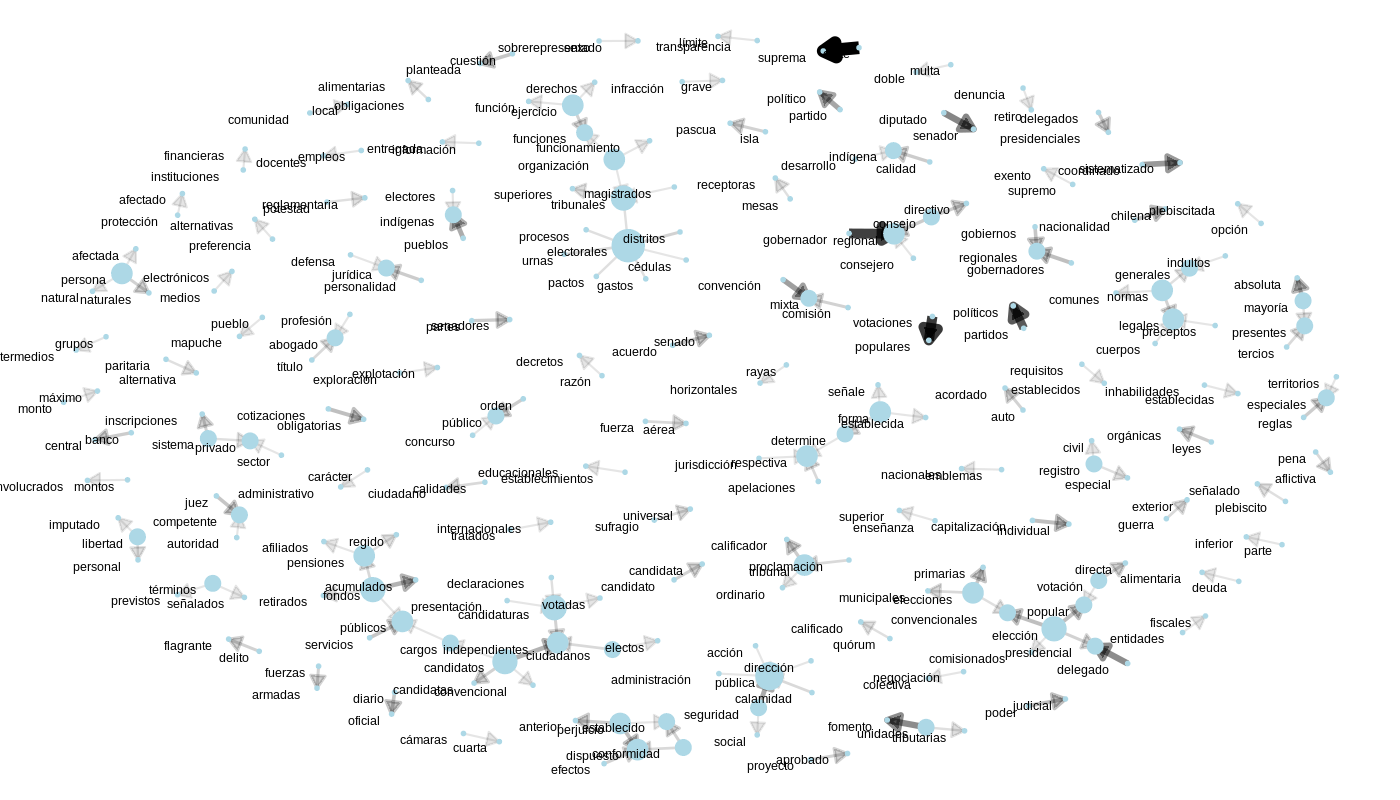

In [ ]:
Image('/content/drive/MyDrive/TareaFinalPLN/Red_Semantica_actual.png')

In [ ]:
#Red Semantica dirigida de bigramas sin pesos
# 3era version
%%R

set.seed(12345)
dev.off()
png(paste0("Red_Semantica_propuesta.png"), width=1400,height=800)
a <- grid::arrow(type = "closed", length = unit(0.2, "inches"))
subt_propuesta <- sep_bigrams_tbl_propuesta %>% filter(n >= 4)
vert_propuesta <- subt_propuesta %>% gather(item, ngram, first, second) %>%
  group_by(ngram) %>% summarise(n = n())
subt_propuesta %>%
  graph_from_data_frame(vertices = vert_propuesta) %>%
  ggraph(layout = "fr") +
  geom_edge_link(aes(width = n,edge_alpha = n), show.legend = FALSE, arrow = a) +
  geom_node_point(aes(size = n), color= "lightblue") + scale_size(range = c(2,15)) +
  geom_node_text(aes(label = name, size=1.2), vjust = 1.2, hjust = 1.35) +
  theme_void() + theme(legend.position = "none")

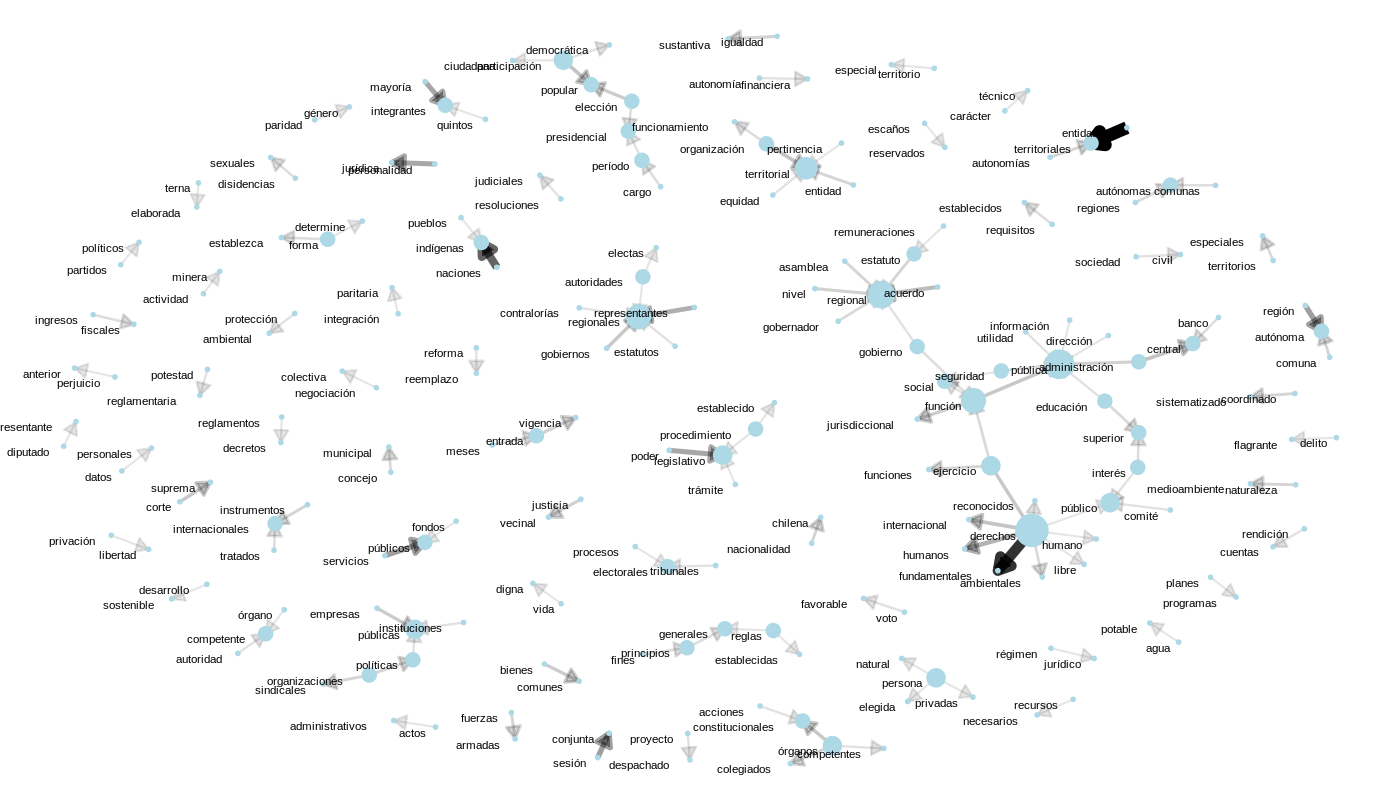

In [ ]:
Image('/content/drive/MyDrive/TareaFinalPLN/Red_Semantica_propuesta.png')

In [ ]:
%%R
library(igraph)
# Generate random graph and community structure
set.seed(12345)
dev.off()
png(paste0("Red_Semantica_actual_com.png"), width=1400,height=800)
subt_actual <- sep_bigrams_tbl_actual %>% filter(n >= 5)
vert_actual <- subt_actual %>% gather(item, ngram, first, second) %>%
        group_by(ngram) %>% summarise(n = n())
g <- graph_from_data_frame(subt_actual, vertices = vert_actual)
wc <- walktrap.community(g)
# # Plot
layout <-layout.fruchterman.reingold(g)
plot(wc, g, layout=layout, vertex.size=V(g)$n*3,  edge.arrow.size=V(g)$n/2, vertex.label=V(g)$names)

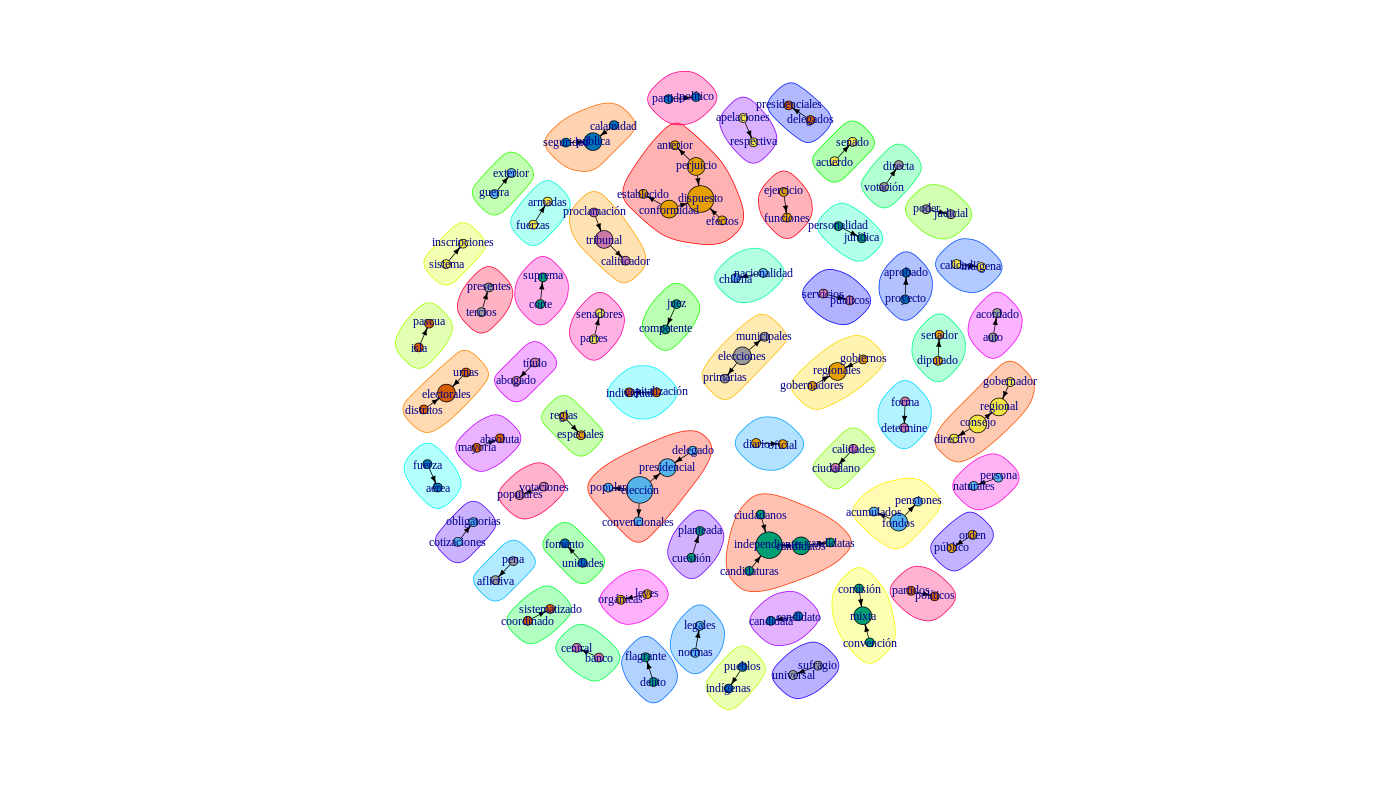

In [ ]:
Image('/content/drive/MyDrive/TareaFinalPLN/Red_Semantica_actual_com.png')

In [ ]:
%%R
library(igraph)
# Generate random graph and community structure
set.seed(12345)
dev.off()
png(paste0("Red_Semantica_propuesta_com.png"), width=1400,height=800)
subt_propuesta <- sep_bigrams_tbl_propuesta %>% filter(n >= 6)
vert_propuesta <- subt_propuesta %>% gather(item, ngram, first, second) %>%
        group_by(ngram) %>% summarise(n = n())
g <- graph_from_data_frame(subt_propuesta, vertices = vert_propuesta)
wc <- walktrap.community(g)
# # Plot
layout <-layout.fruchterman.reingold(g)
plot(wc, g, layout=layout, vertex.size=V(g)$n*2,  edge.arrow.size=V(g)$n/2, vertex.label=V(g)$names)

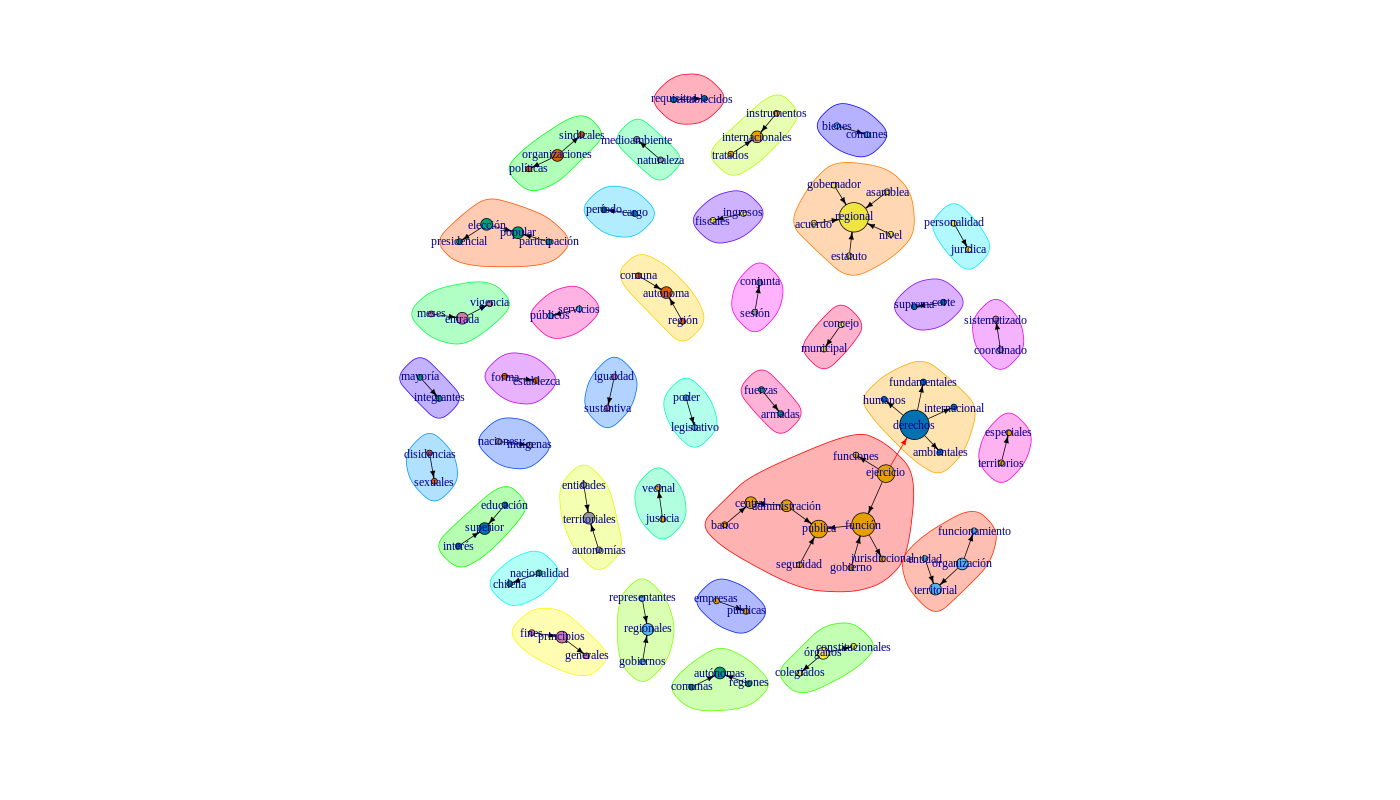

In [ ]:
Image('/content/drive/MyDrive/TareaFinalPLN/Red_Semantica_propuesta_com.png')